In [ ]:
# citations: GA lab 10.02 NN Classification, GA lesson CNN

# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras import regularizers

In [ ]:
# Load the training data (fashion-mnist_train.csv) from Kaggle
from google.colab import drive

drive.mount('/content/drive')

chars = pd.read_csv('./drive/MyDrive/Dig-MNIST.csv')
chars.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
chars.shape

(10240, 785)

In [ ]:
chars.isna().sum().sum()

0

In [ ]:
# Set up X & y
X = chars.drop(columns = 'label')
y = chars['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X.shape, y.shape

((10240, 784), (10240,))

In [ ]:
X_train.shape, X_test.shape

((7680, 784), (2560, 784))

In [ ]:
y_train.shape, y_test.shape

((7680,), (2560,))

In [ ]:
# Scale, make into numpy arrays, and reshape

# Scale
X_train = X_train/255.
X_test = X_test/255.

# make numpy arrays
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
# reshape- we need 3D data, the last value is reseved for the RGB color channel.
# our data is black and white
X_train = X_train.reshape(-1, 28, 28, 1 )
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape, y_train.shape

((7680, 28, 28, 1), (7680,))

It thinks it is class 9, and it is,  9


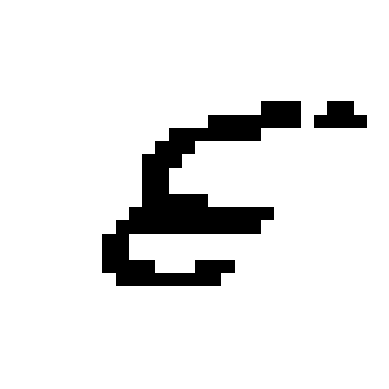

In [ ]:
# Sanity Check
# Let's look at one image, and target to make sure it is mapping correctly
plt.axis('off')
plt.imshow(X_train[10], cmap = 'binary')

# so cool!
print('It thinks it is class 9, and it is, ', y_train[10])

In [ ]:
# What is the shape we need to feed our cnn's first layer?
X_train[0].shape

(28, 28, 1)

**Help understanding why we need 'relu'**

[Source: quora.com]('https://www.quora.com/What-are-activation-functions-and-do-you-need-them-when-using-convolutional-layers-in-a-convolutional-neural-network-CNN#:~:text=Even%20in%20convolutional%20layers%2C%20you,to%20navigate%20more%20complex%20routes')


After every convolution operation, the activation function introduces non-linearity into the model, helping it learn from complex data. It's like adding some twists and turns to a straight path, so the model can learn to navigate more complex routes.

**Help understanding the arguments in `MaxPooling2d`**

*citation:*

Asked ChatGPT the following:
"You are a brilliant data science instructor
You are clear and concise
you ask many clarifying questions, especially to figure out how much I know; because you don't want to mansplain or lose me
you are warm and encouraging.
I need to conceptually understand what the argument '2' does in `MaxPood2D(2)`"


Output:

"When you perform max pooling in a convolutional neural network (CNN), you're essentially downsampling the input feature map. This is done by dividing the input into non-overlapping rectangular regions (windows) and then taking the maximum value from each of these regions.

The '2' in `MaxPool2D(2)` indicates the size of this rectangular window. So, for example, if your input feature map is of size 4x4, and you apply `MaxPool2D(2)`, it will downsample the feature map by taking the maximum value within each 2x2 window. The resulting output feature map will be half the size in both dimensions (2x2 in this case).

Understanding the argument helps you grasp the granularity of the downsampling operation. It's essential for controlling the size and information retention in the network's feature maps."

In [ ]:
# CNN 1: input layer + 1 hidden layer
cnn1 = Sequential()

# Convoluting and MaxPooling
# input (which includes one hidden layer because Sequential does that)
cnn1.add(Conv2D(32,
                3,
                activation = 'relu',
                input_shape = (28, 28, 1)))
cnn1.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn1.add(Conv2D(64, 3, activation = 'relu'))
cnn1.add(MaxPooling2D(2))

# Output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn1.add(Flatten())
cnn1.add(Dense(10, activation = 'softmax'))

# compiling the model
cnn1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

NameError: name 'Sequential' is not defined

In [ ]:
# fit the model
history1 = cnn1.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 128,
                    epochs = 10)

Epoch 1/10
60/60 [==============================] - 7s 110ms/step - loss: 1.1865 - acc: 0.6743 - val_loss: 0.6070 - val_acc: 0.8223
Epoch 2/10
60/60 [==============================] - 7s 115ms/step - loss: 0.4995 - acc: 0.8513 - val_loss: 0.3832 - val_acc: 0.8859
Epoch 3/10
60/60 [==============================] - 6s 92ms/step - loss: 0.3465 - acc: 0.8962 - val_loss: 0.2986 - val_acc: 0.9109
Epoch 4/10
60/60 [==============================] - 8s 131ms/step - loss: 0.2802 - acc: 0.9161 - val_loss: 0.2423 - val_acc: 0.9273
Epoch 5/10
60/60 [==============================] - 5s 89ms/step - loss: 0.2311 - acc: 0.9293 - val_loss: 0.2173 - val_acc: 0.9316
Epoch 6/10
60/60 [==============================] - 6s 108ms/step - loss: 0.1987 - acc: 0.9385 - val_loss: 0.2003 - val_acc: 0.9410
Epoch 7/10
60/60 [==============================] - 7s 113ms/step - loss: 0.1718 - acc: 0.9479 - val_loss: 0.1887 - val_acc: 0.9391
Epoch 8/10
60/60 [==============================] - 6s 96ms/step - loss: 0.155

In [ ]:
cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

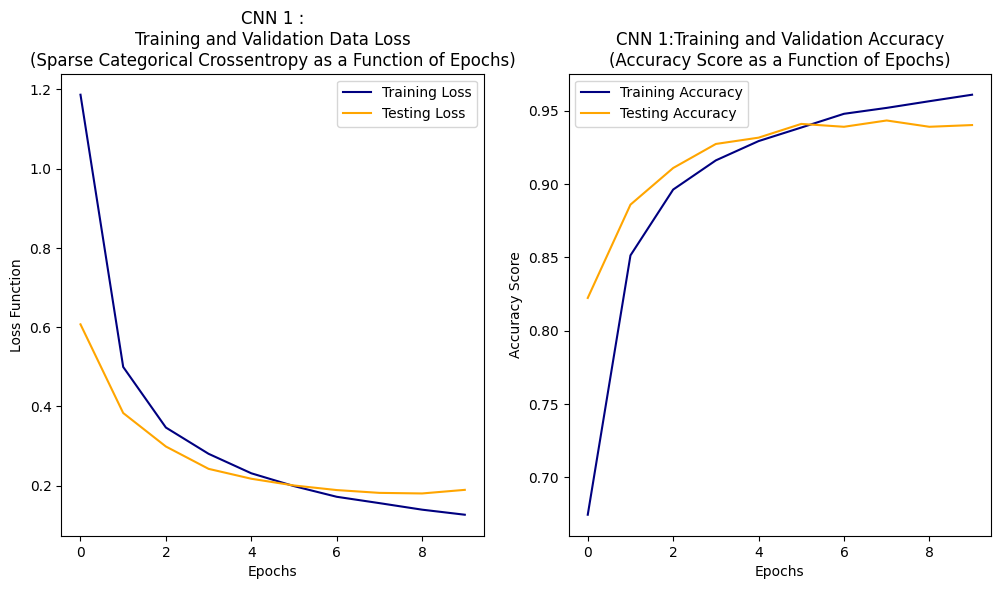

In [ ]:
# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history1.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history1.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 1 :
Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history1.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history1.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 1:
Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();


**Observations on cnn1:**

| Model   | Loss  | Accuracy | Validation Loss | Validation Accuracy |
|---------|-------|----------|-----------------|---------------------|
| cnn1    | 0.1265| 0.9609   | 0.1893          | 0.9402              |


The cnn1 model achieved a training loss of 0.1265 and an accuracy of 0.9609. On the validation set, the model’s loss was 0.1893, with a validation accuracy of 0.9402. This indicates that the model performs well, with high accuracy and relatively low loss on both the training and validation datasets.  That being said this does indicates a slightly overfit model.



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

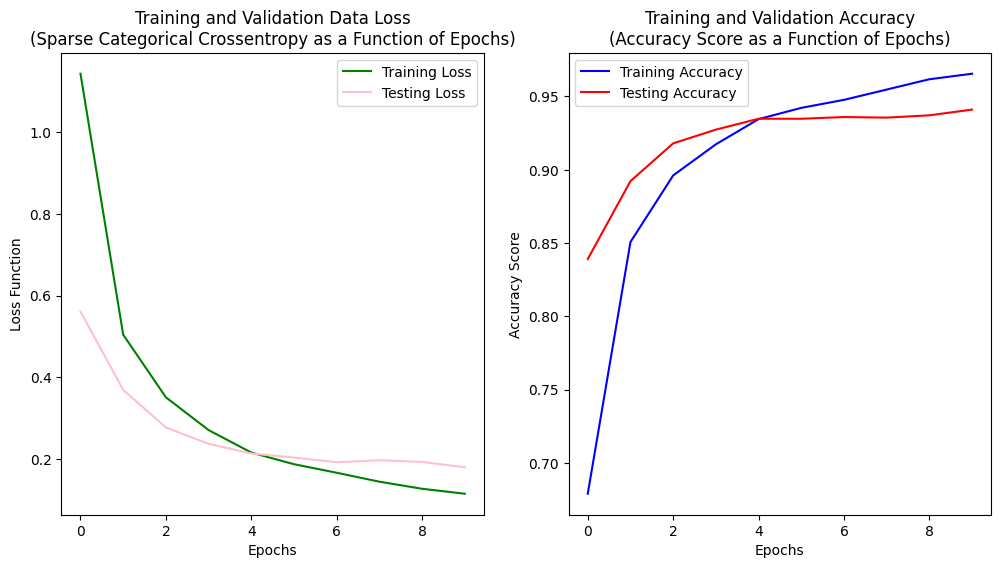

In [ ]:
# CNN 2: input layer + 1 hidden layers

cnn2 = Sequential()

# convoluting and MaxPooling
#
cnn2.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1)))
# MaxPool layer to go with the first convolutional layer
cnn2.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn2.add(Conv2D(128, 2, activation = 'relu'))
cnn2.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn2.add(Flatten())
cnn2.add(Dense(10, activation = 'softmax'))

cnn2.summary()

cnn2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history2 = cnn2.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 10)

# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history2.history['loss'], c = 'green', label = 'Training Loss');
plt.plot(history2.history['val_loss'], c = 'pink', label = 'Testing Loss');

plt.title('''CNN2:
Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history2.history['acc'], c = 'blue', label = 'Training Accuracy');
plt.plot(history2.history['val_acc'], c = 'red', label = 'Testing Accuracy');
plt.title('''CNN 2:
Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

| Model   | Loss  | Accuracy | Validation Loss | Validation Accuracy |
|---------|-------|----------|-----------------|---------------------|
| cnn1    | 0.1265| 0.9609   | 0.1893          | 0.9402              |
| cnn2    | 0.1155| 0.9655   | 0.1801          | 0.9410              |


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 10)               

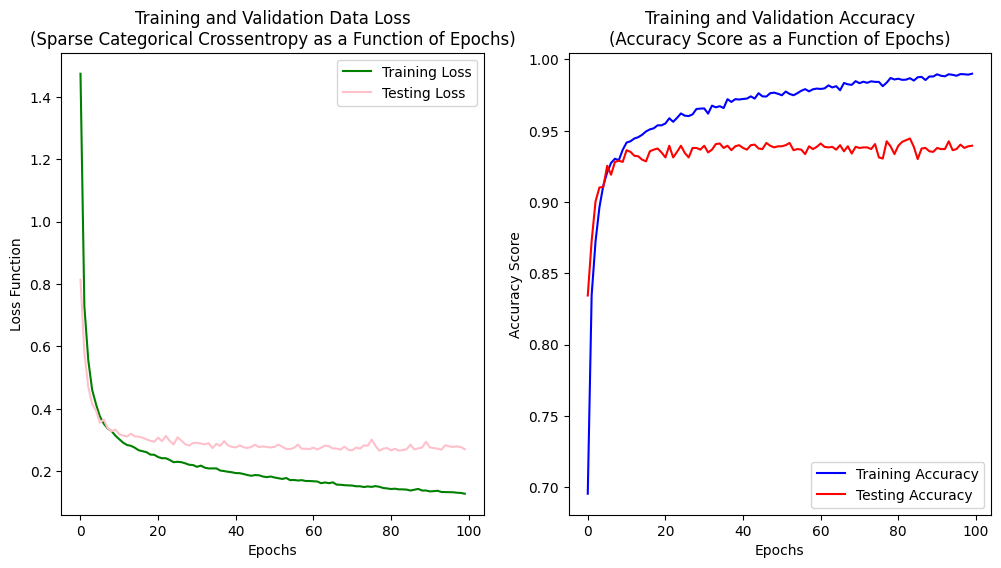

In [ ]:
# CNN3: input layer + 1 hidden layers + l2 regularization + 100 epochs instead of 10

cnn3 = Sequential()

# convoluting and MaxPooling
cnn3.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1),
                kernel_regularizer = regularizers.l2(0.01)))

# MaxPool layer to go with the first convolutional layer
cnn3.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn3.add(Conv2D(128, 2,
                activation = 'relu',
                kernel_regularizer = regularizers.l2(0.01)))
cnn3.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn3.add(Flatten())
cnn3.add(Dense(10, activation = 'softmax'))

cnn3.summary()

cnn3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history3 = cnn3.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 100)

# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history3.history['loss'], c = 'green', label = 'Training Loss');
plt.plot(history3.history['val_loss'], c = 'pink', label = 'Testing Loss');

plt.title('''CNN 3:
Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history3.history['acc'], c = 'blue', label = 'Training Accuracy');
plt.plot(history3.history['val_acc'], c = 'red', label = 'Testing Accuracy');
plt.title('''CNN 3:
Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

Some research on how to apply L2 regularization to my model. [Source: datascience.stackexchange]('https://datascience.stackexchange.com/questions/15137/whats-the-best-way-to-tune-the-regularization-parameter-in-neural-nets')

The brute-force scan/search, or a grid search across multiple parameters, is still a very common and workable approach. As is random search, just trying some variations of parameters automatically and picking the best result from cross validation.

A guided search by intuitive feel of what might best work is also still quite common approach, despite being characterised as "optimisation by graduate descent" (a pun based on the fact that a senior researcher will hand off the tuning work to their smart junior researchers who make educated guesses on hyperparameter values) - for regularisation parameters you can look at training curves and difference between training loss vs cv loss to help decide where to look. You generally want to increase regularisation if there is a large difference and decrease it if the values become close but not very good. What counts and as "large difference" and "not very good" is subjective though, and typically you only get a feel for what works after a few random attempts and immersing yourself in the problem so that you recognise good vs bad behaviour of a model.



**Summary and Observations of the models so far: CNN1, CNN2, and CNN3**

Our best performing model is CNN2. It has the best scores and only slightly overfits. It has only one hidden layer, suggesting that a simpler model, with a small dimension for the convolution filter is a good choice.

| Model |   Loss   | Accuracy | Validation Loss | Validation Accuracy |
|-------|----------|----------|-----------------|---------------------|
| cnn1  | 0.1265   | 0.9609   | 0.1893          | 0.9402              |
| cnn2  | 0.1155   | 0.9655   | 0.1801          | 0.9410              |
| cnn3  | 0.1331   | 0.9902   | 0.2709          | 0.9363              |
              |


Epoch 1/100
60/60 [==============================] - 11s 174ms/step - loss: 1.0616 - acc: 0.7168 - val_loss: 0.5799 - val_acc: 0.8391
Epoch 2/100
60/60 [==============================] - 7s 122ms/step - loss: 0.5194 - acc: 0.8448 - val_loss: 0.4095 - val_acc: 0.8832
Epoch 3/100
60/60 [==============================] - 10s 163ms/step - loss: 0.3606 - acc: 0.8951 - val_loss: 0.3015 - val_acc: 0.9191
Epoch 4/100
60/60 [==============================] - 8s 135ms/step - loss: 0.2733 - acc: 0.9167 - val_loss: 0.2496 - val_acc: 0.9227
Epoch 5/100
60/60 [==============================] - 9s 148ms/step - loss: 0.2261 - acc: 0.9290 - val_loss: 0.2247 - val_acc: 0.9332
Epoch 6/100
60/60 [==============================] - 9s 153ms/step - loss: 0.1928 - acc: 0.9436 - val_loss: 0.2102 - val_acc: 0.9363
Epoch 7/100
60/60 [==============================] - 8s 125ms/step - loss: 0.1665 - acc: 0.9520 - val_loss: 0.1891 - val_acc: 0.9418
Epoch 8/100
60/60 [==============================] - 9s 158ms/step 

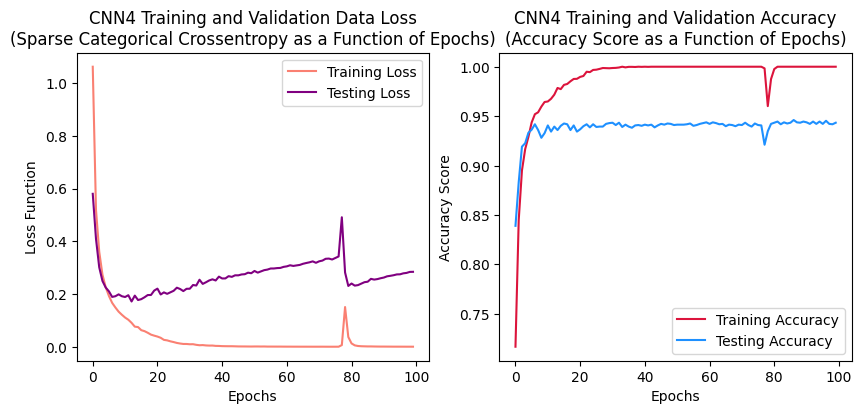

In [ ]:
# CNN4: input layer + 1 hidden layers, adding Dropout

cnn4 = Sequential()

# convoluting and MaxPooling
#
cnn4.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1)))

# applying dropout
cnn4.add(Dropout(0.1))

# MaxPool layer to go with the first convolutional layer
cnn4.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn4.add(Conv2D(128, 2, activation = 'relu'))

cnn4.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn4.add(Flatten())
cnn4.add(Dense(10, activation = 'softmax'))

cnn4.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history4 = cnn4.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 100)

plt.figure(figsize = (10, 4));

plt.subplot(1,2,1)
plt.plot(history4.history['loss'], c = 'salmon', label = 'Training Loss');
plt.plot(history4.history['val_loss'], c = 'purple', label = 'Testing Loss');

plt.title('''CNN4 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history4.history['acc'], c = 'crimson', label = 'Training Accuracy');
plt.plot(history4.history['val_acc'], c = 'dodgerblue', label = 'Testing Accuracy');
plt.title('''CNN4 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

Epoch 1/100
60/60 [==============================] - 8s 124ms/step - loss: 1.4731 - acc: 0.5573 - val_loss: 0.6942 - val_acc: 0.7930
Epoch 2/100
60/60 [==============================] - 10s 162ms/step - loss: 0.5483 - acc: 0.8324 - val_loss: 0.5178 - val_acc: 0.8336
Epoch 3/100
60/60 [==============================] - 7s 120ms/step - loss: 0.3920 - acc: 0.8783 - val_loss: 0.3219 - val_acc: 0.9000
Epoch 4/100
60/60 [==============================] - 10s 159ms/step - loss: 0.3142 - acc: 0.9025 - val_loss: 0.2934 - val_acc: 0.9055
Epoch 5/100
60/60 [==============================] - 7s 120ms/step - loss: 0.2667 - acc: 0.9159 - val_loss: 0.2568 - val_acc: 0.9164
Epoch 6/100
60/60 [==============================] - 9s 156ms/step - loss: 0.2452 - acc: 0.9221 - val_loss: 0.2584 - val_acc: 0.9207
Epoch 7/100
60/60 [==============================] - 7s 123ms/step - loss: 0.2106 - acc: 0.9355 - val_loss: 0.2263 - val_acc: 0.9273
Epoch 8/100
60/60 [==============================] - 12s 196ms/step

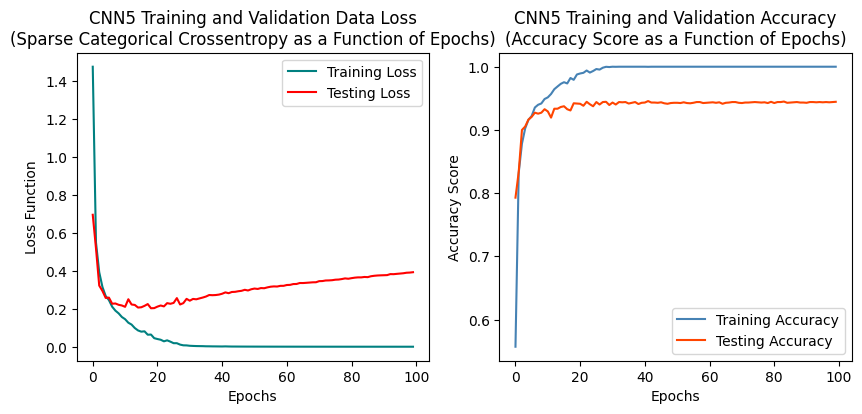

In [ ]:
# CNN 5: input layer + 2 hidden layers

cnn5 = Sequential()

# convoluting and MaxPooling
#
cnn5.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1)))
# MaxPool layer to go with the first convolutional layer

cnn5.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn5.add(Conv2D(128, 2, activation = 'relu'))

cnn5.add(MaxPooling2D(2))

# add our second explicit hidden layer
cnn5.add(Conv2D(128, 2, activation = 'relu'))

cnn5.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn5.add(Flatten())
cnn5.add(Dense(10, activation = 'softmax'))


cnn5.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history5 = cnn5.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 100)

plt.figure(figsize = (10, 4));

plt.subplot(1,2,1)
plt.plot(history5.history['loss'], c = 'teal', label = 'Training Loss');
plt.plot(history5.history['val_loss'], c = 'red', label = 'Testing Loss');

plt.title('''CNN5 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history5.history['acc'], c = 'steelblue', label = 'Training Accuracy');
plt.plot(history5.history['val_acc'], c = 'orangered', label = 'Testing Accuracy');
plt.title('''CNN5 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();




| Model | Hidden Layers | Neurons | Conv Filter Size | Regularization | Loss   | Accuracy | Val Loss | Val Accuracy | Performance Rank: based on validation accuracy score|
|-------|---------------|---------|------------------|----------------|--------|----------|----------|--------------|------------------|
| cnn1  | 1             | 32→128→10 | 3x3              | None           | 0.1265 | 0.9609   | 0.1893   | 0.9402       | 4                |
| cnn2  | 1             | 32→128→10 | 2x2              | None           | 0.1155 | 0.9655   | 0.1801   | 0.9410       | 3                |
| cnn3  | 1             | 32→128→10 | 2x2              | L2 (0.01)      | 0.1283 | 0.9900   | 0.2708   | 0.9395       | 1 or 2               |
| cnn4  | 1             | 32→128→10 | 2x2              | Dropout (0.1)   | 1.3240 | 1.0000   | 0.3481   | 0.9426       | 1 or 2                |
| cnn5  | 2             | 32→128→128→10 | 2x2          | None           | 5.9969 | 1.0000   | 0.3376   | 0.9473       | 5                |

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 4608)            

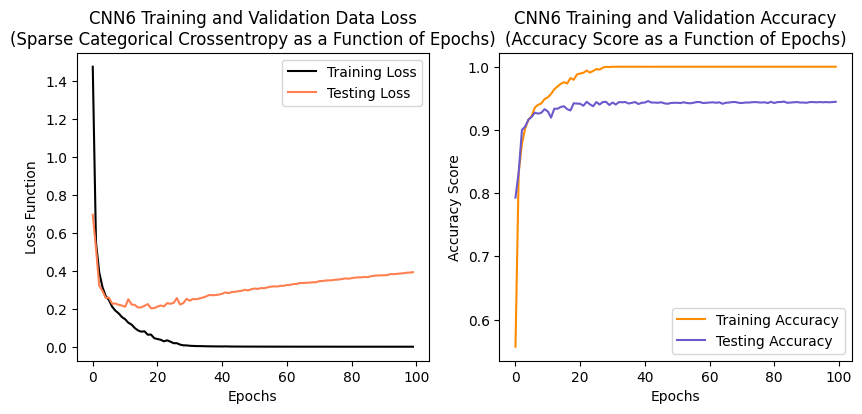

In [ ]:
# CNN 6: combine the regularization from CNN 3 & 4 - both L2(input and hidden laer) and Dropout(input layer only)

cnn6 = Sequential()

# convoluting and MaxPooling

cnn6.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1),
                kernel_regularizer = regularizers.l2(0.01)))

# applying dropout
cnn6.add(Dropout(0.1))

# MaxPool layer to go with the first convolutional layer
cnn6.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn6.add(Conv2D(128, 2,
                activation = 'relu',
                kernel_regularizer = regularizers.l2(0.01)))
cnn6.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn6.add(Flatten())
cnn6.add(Dense(10, activation = 'softmax'))

cnn6.summary()

cnn6.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history6 = cnn6.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 100)

plt.figure(figsize = (10, 4));

plt.subplot(1,2,1)
plt.plot(history5.history['loss'], c = 'black', label = 'Training Loss');
plt.plot(history5.history['val_loss'], c = 'coral', label = 'Testing Loss');

plt.title('''CNN6 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history5.history['acc'], c = 'darkorange', label = 'Training Accuracy');
plt.plot(history5.history['val_acc'], c = 'slateblue', label = 'Testing Accuracy');
plt.title('''CNN6 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();











Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 dropout_2 (Dropout)         (None, 27, 27, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 128)       16512     
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                               

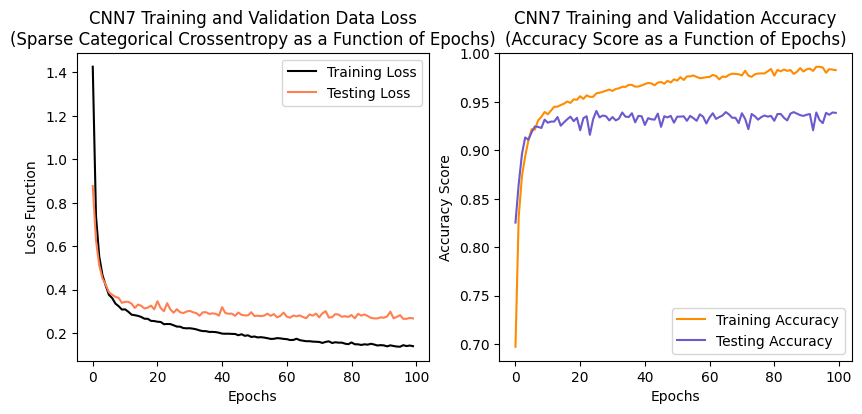

In [ ]:
# CNN 7: combine the regularization from CNN 3 & 4 - both L2(input and hidden layer) and Dropout(input and hidden layer)

cnn7 = Sequential()

# convoluting and MaxPooling
cnn7.add(Conv2D(32,
                2,
                activation = 'relu',
                input_shape = (28, 28, 1),
                kernel_regularizer = regularizers.l2(0.01)))

# applying dropout
cnn7.add(Dropout(0.1))

# MaxPool layer to go with the first convolutional layer
cnn7.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn7.add(Conv2D(128, 2,
                activation = 'relu',
                kernel_regularizer = regularizers.l2(0.01)))

# applying dropout & MaxPooling
cnn7.add(Dropout(0.1))
cnn7.add(MaxPooling2D(2))

# output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn7.add(Flatten())
cnn7.add(Dense(10, activation = 'softmax'))

cnn7.summary()

cnn7.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

# fit the model
history7 = cnn7.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   batch_size = 128,
                   epochs = 100)

plt.figure(figsize = (10, 4));

plt.subplot(1,2,1)
plt.plot(history7.history['loss'], c = 'black', label = 'Training Loss');
plt.plot(history7.history['val_loss'], c = 'coral', label = 'Testing Loss');

plt.title('''CNN7 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history7.history['acc'], c = 'darkorange', label = 'Training Accuracy');
plt.plot(history7.history['val_acc'], c = 'slateblue', label = 'Testing Accuracy');
plt.title('''CNN7 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();


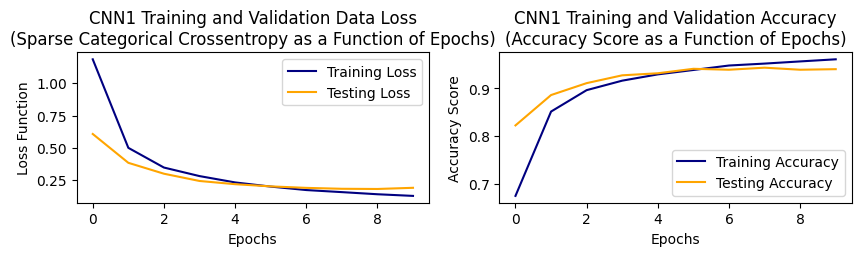

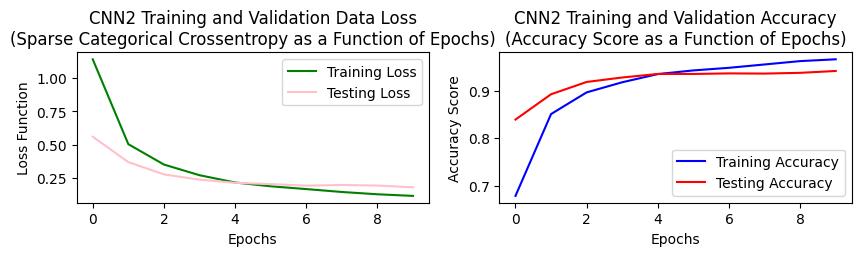

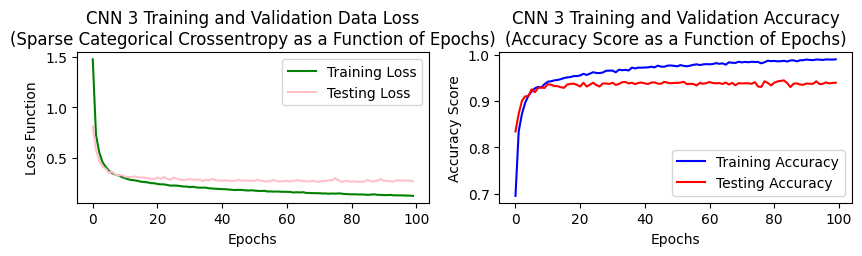

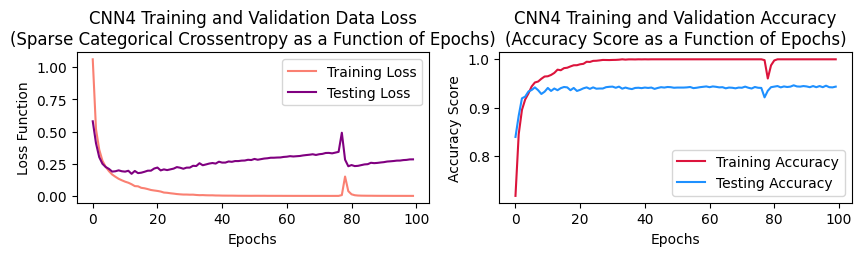

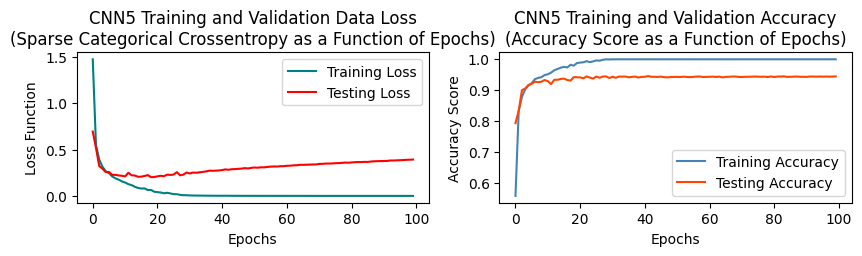

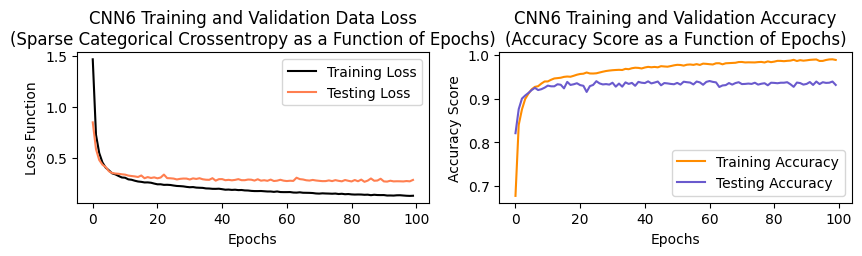

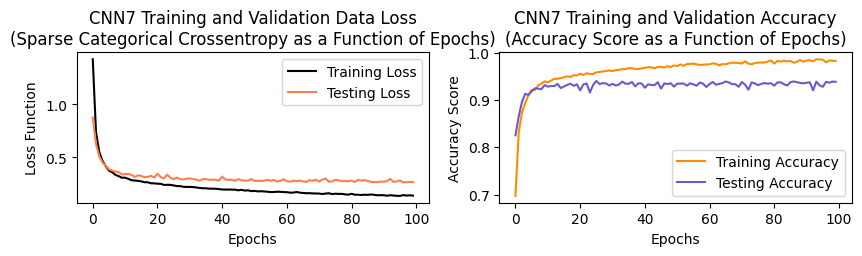

In [ ]:
# CNN1
plt.figure(figsize = (10, 16));

plt.subplot(7,2,1)
plt.plot(history1.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history1.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN1 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 2)
plt.plot(history1.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history1.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN1 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();


# CNN2
plt.figure(figsize = (10, 16));

plt.subplot(7,2,3)
plt.plot(history2.history['loss'], c = 'green', label = 'Training Loss');
plt.plot(history2.history['val_loss'], c = 'pink', label = 'Testing Loss');

plt.title('''CNN2 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 4)
plt.plot(history2.history['acc'], c = 'blue', label = 'Training Accuracy');
plt.plot(history2.history['val_acc'], c = 'red', label = 'Testing Accuracy');
plt.title('''CNN2 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

# CNN3

plt.figure(figsize = (10, 16));

plt.subplot(7,2,5)
plt.plot(history3.history['loss'], c = 'green', label = 'Training Loss');
plt.plot(history3.history['val_loss'], c = 'pink', label = 'Testing Loss');

plt.title('''CNN 3 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 6)
plt.plot(history3.history['acc'], c = 'blue', label = 'Training Accuracy');
plt.plot(history3.history['val_acc'], c = 'red', label = 'Testing Accuracy');
plt.title('''CNN 3 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

#CNN4

plt.figure(figsize = (10, 16));

plt.subplot(7,2,7)
plt.plot(history4.history['loss'], c = 'salmon', label = 'Training Loss');
plt.plot(history4.history['val_loss'], c = 'purple', label = 'Testing Loss');

plt.title('''CNN4 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 8)
plt.plot(history4.history['acc'], c = 'crimson', label = 'Training Accuracy');
plt.plot(history4.history['val_acc'], c = 'dodgerblue', label = 'Testing Accuracy');
plt.title('''CNN4 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

#CNN5
plt.figure(figsize = (10, 16));

plt.subplot(7,2,9)
plt.plot(history5.history['loss'], c = 'teal', label = 'Training Loss');
plt.plot(history5.history['val_loss'], c = 'red', label = 'Testing Loss');

plt.title('''CNN5 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 10)
plt.plot(history5.history['acc'], c = 'steelblue', label = 'Training Accuracy');
plt.plot(history5.history['val_acc'], c = 'orangered', label = 'Testing Accuracy');
plt.title('''CNN5 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

#CNN6

plt.figure(figsize = (10, 16));

plt.subplot(7, 2, 11)
plt.plot(history6.history['loss'], c = 'black', label = 'Training Loss');
plt.plot(history6.history['val_loss'], c = 'coral', label = 'Testing Loss');

plt.title('''CNN6 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 12)
plt.plot(history6.history['acc'], c = 'darkorange', label = 'Training Accuracy');
plt.plot(history6.history['val_acc'], c = 'slateblue', label = 'Testing Accuracy');
plt.title('''CNN6 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

#CNN7
plt.figure(figsize = (10, 16));

plt.subplot(7, 2, 13)
plt.plot(history7.history['loss'], c = 'black', label = 'Training Loss');
plt.plot(history7.history['val_loss'], c = 'coral', label = 'Testing Loss');

plt.title('''CNN7 Training and Validation Data Loss
(Sparse Categorical Crossentropy as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(7, 2, 14)
plt.plot(history7.history['acc'], c = 'darkorange', label = 'Training Accuracy');
plt.plot(history7.history['val_acc'], c = 'slateblue', label = 'Testing Accuracy');
plt.title('''CNN7 Training and Validation Accuracy
(Accuracy Score as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();




| Model | Hidden Layers | Neuron Progression | Filter Size | Regularization | Epochs | Loss   | Accuracy | Validation Loss | Validation Accuracy | Performance Rank (Validation Accuracy) | Performance Rank (Validation Loss) | Average Rank |
|-------|---------------|--------------------|-------------|----------------|--------|--------|----------|-----------------|---------------------|--------------------------------------|-----------------------------------|--------------|
| cnn1  | 1             | 32 → 128 → 10      | 3 x 3       | None           | 10     | 0.1265 | 0.9609   | 0.1893          | 0.9402              | 5                                    | 2                                 | 3.5          |
| cnn2  | 1             | 32 → 128 → 10      | 2 x 2       | None           | 10     | 0.1155 | 0.9655   | 0.1801          | 0.9410              | 4                                    | 1                                 | 2.5          |
| cnn3  | 1             | 32 → 128 → 10      | 2 x 2       | L2 (0.01)      | 100    | 0.1283 | 0.9900   | 0.2708          | 0.9395              | 6                                    | 4                                 | 5            |
| cnn4  | 1             | 32 → 128 → 10      | 2 x 2       | Dropout (0.1)   | 100    | 1.3240 | 1.0000   | 0.3481          | 0.9426              | 2                                    | 6                                 | 4            |
| cnn5  | 2             | 32 → 128 → 128 → 10| 2 x 2       | None           | 100    | 5.9969 | 1.0000   | 0.3376          | 0.9473              | 1                                    | 7                                 | 4            |
| cnn6  | 2             | 32 → 128 → 10      | 2 x 2       | L2 + Dropout   | 100    | 0.1294 | 0.9896   | 0.2703          | 0.9379              | 3                                    | 3                                 | 3            |
| cnn7  | 2             | 32 → 128 → 10      | 2 x 2       | L2 + Dropout   | 100    | 0.1372 | 0.9850   | 0.2895          | 0.9277              | 7                                    | 5                                 | 6            |


80/80 [==============================] - 1s 8ms/step


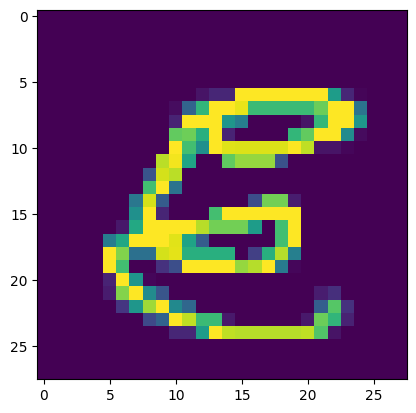

The model predicted class 9, but the truth is 6


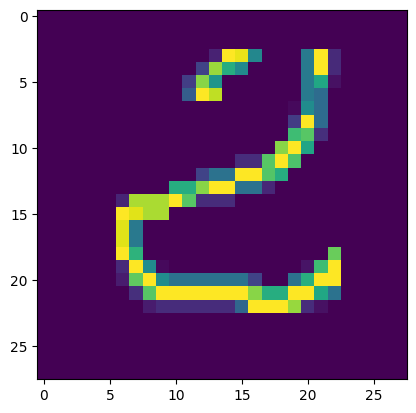

The model predicted class 6, but the truth is 7


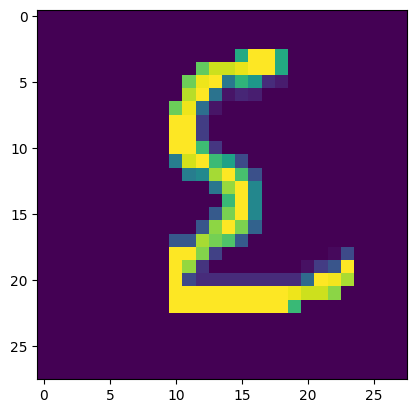

The model predicted class 9, but the truth is 6


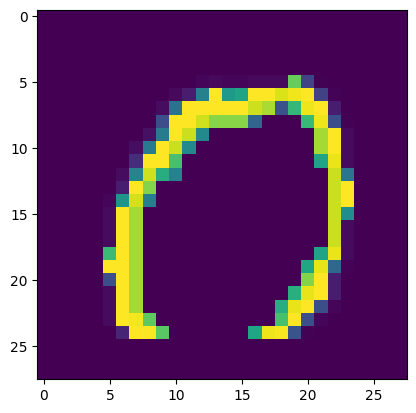

The model predicted class 1, but the truth is 0


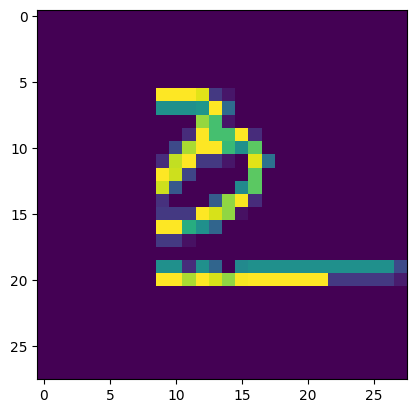

The model predicted class 7, but the truth is 6


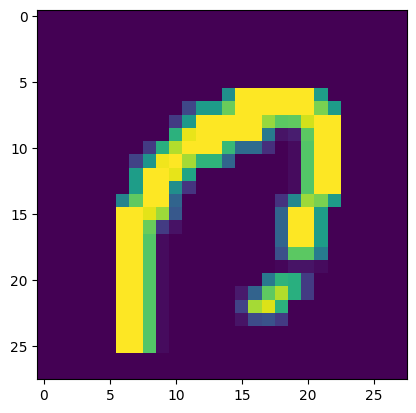

The model predicted class 0, but the truth is 1


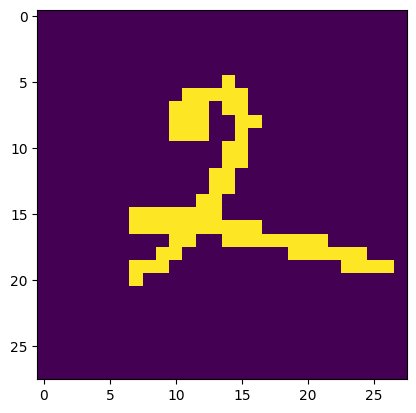

The model predicted class 7, but the truth is 3


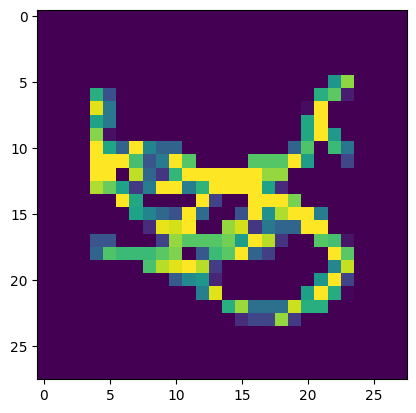

The model predicted class 6, but the truth is 8


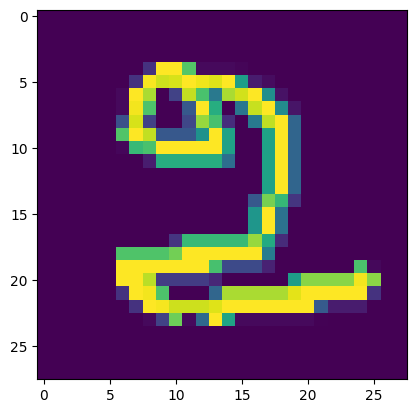

The model predicted class 3, but the truth is 7


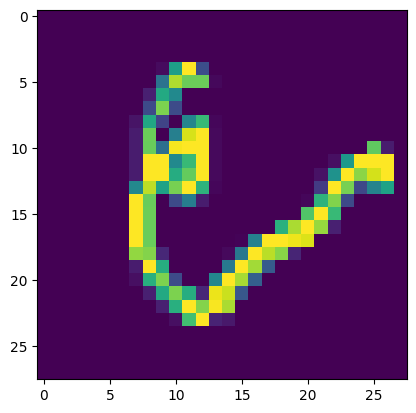

The model predicted class 8, but the truth is 6


In [ ]:
# Lets Visualize the Images it classified incorrectly in our best model
best_pred = np.argmax(cnn6.predict(X_test), axis =1)

# We will compare these predictions to y_test and show which ones don't agree
wrongs = np.where(best_pred != y_test)[0]
for i in wrongs[:10]:
  plt.clf()
  plt.imshow(X_test[i])
  plt.show()
  pred = best_pred[i]
  truth = y_test[i]
  print(f'The model predicted class {pred}, but the truth is {truth}')

80/80 [==============================] - 1s 16ms/step


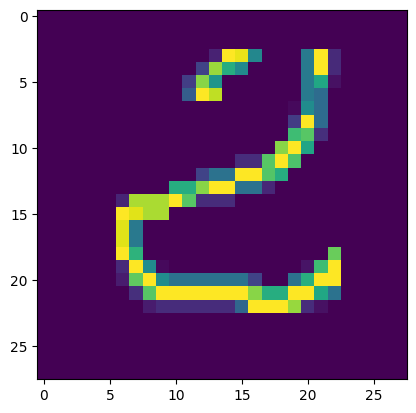

The model predicted class 6, but the truth is 7


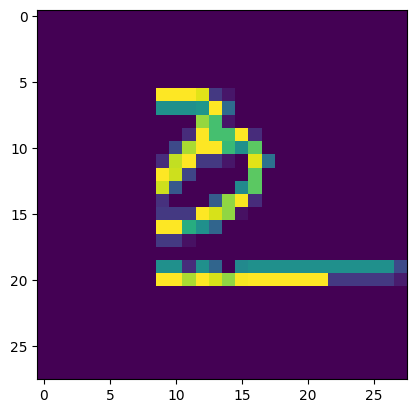

The model predicted class 7, but the truth is 6


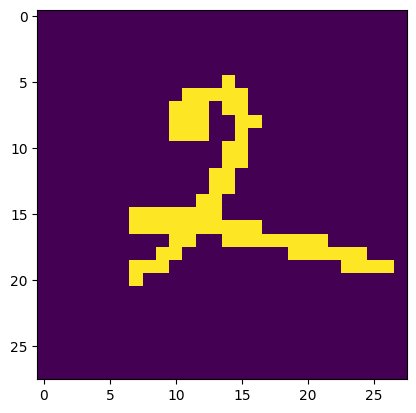

The model predicted class 7, but the truth is 3


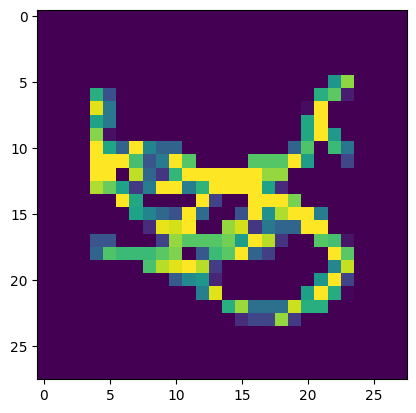

The model predicted class 6, but the truth is 8


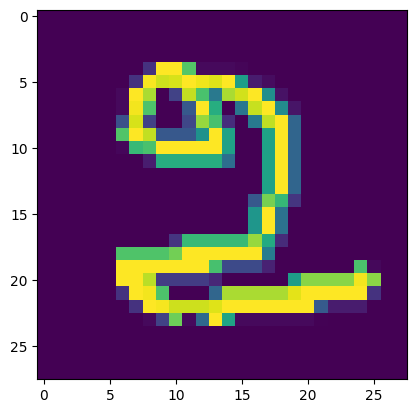

The model predicted class 3, but the truth is 7


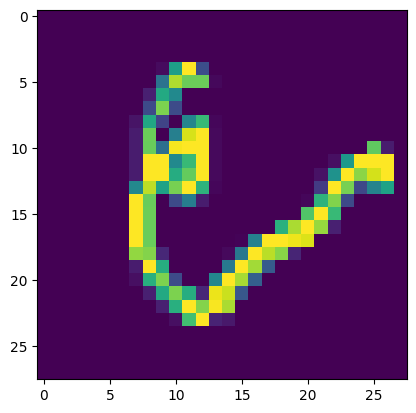

The model predicted class 8, but the truth is 6


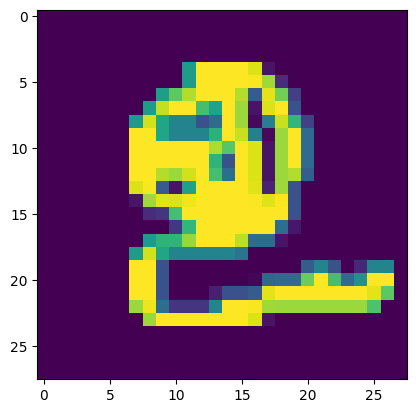

The model predicted class 6, but the truth is 7


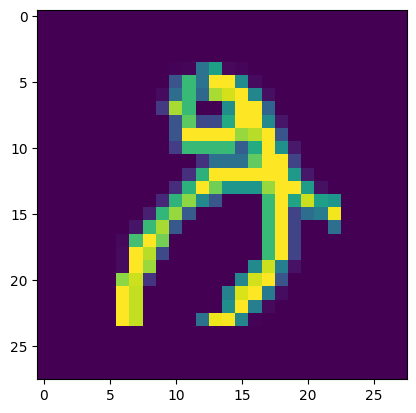

The model predicted class 5, but the truth is 3


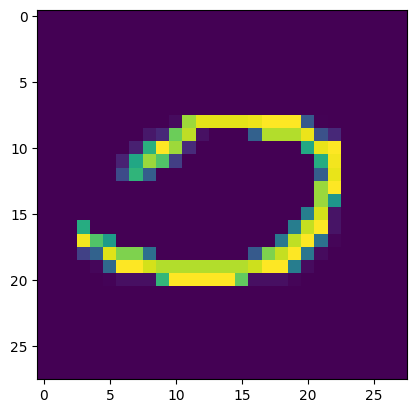

The model predicted class 2, but the truth is 0


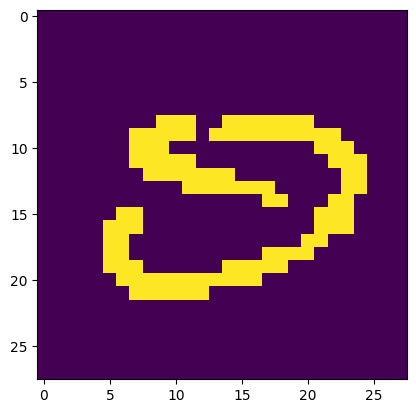

The model predicted class 0, but the truth is 2


In [ ]:
# Lets Visualize the Images it classified incorrectly in our best model
best_pred = np.argmax(cnn2.predict(X_test), axis =1)

# We will compare these predictions to y_test and show which ones don't agree
wrongs = np.where(best_pred != y_test)[0]
for i in wrongs[:10]:
  plt.clf()
  plt.imshow(X_test[i])
  plt.show()
  pred = best_pred[i]
  truth = y_test[i]
  print(f'The model predicted class {pred}, but the truth is {truth}')